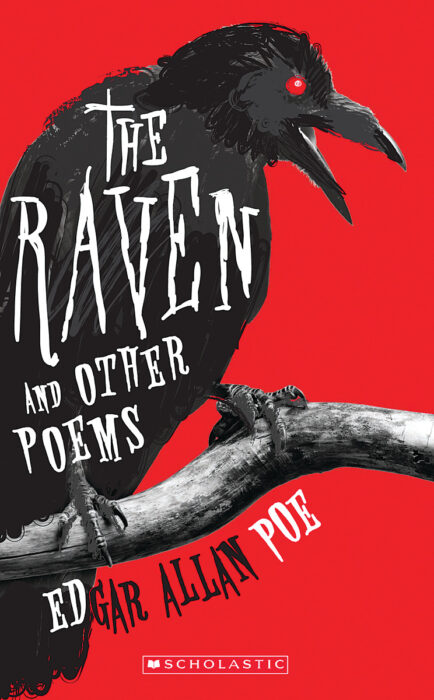

In [11]:
from IPython.display import Image, display
display(Image(filename="TheRaven.jpg"))

# 🦅 Resumen del Poema "The Raven" - Edgar Allan Poe

Este es un resumen claro y educativo del famoso poema **"The Raven"** (*El Cuervo*) escrito por **Edgar Allan Poe** en 1845. Ideal para estudiantes, docentes o lectores curiosos.

---

## 📚 Autor

**Edgar Allan Poe (EE.UU., 1845)**  
Uno de los grandes maestros del terror y la literatura gótica del siglo XIX.

---

## 🕰️ Contexto

> El poema fue escrito en el siglo XIX, durante una época en la que Poe exploraba temas oscuros como la muerte, el duelo y la locura.  
> Refleja el dolor humano ante la pérdida y el misterio de lo sobrenatural.

---

## 🎯 Tema Principal

> El duelo eterno por la pérdida de un ser amado (*Leonora*) y la lenta caída del protagonista en la desesperación.

---

## 🎭 Ambiente Emocional

> Tristeza, soledad, obsesión y creciente locura.  
> Todo ocurre en una noche oscura mientras el protagonista está solo.

---

## 🦅 Símbolo Central: El Cuervo

> El cuervo representa la **muerte**, la **memoria imborrable** y la **falta de esperanza**.  
> Su repetida palabra **"Nevermore"** marca el deterioro mental del narrador.

---

## 🔚 Final del Poema

> El cuervo no se va, y el narrador concluye que su alma está atrapada para siempre en la sombra del dolor.  
> El poema termina sin redención ni consuelo.

---

## ✅ ¿Qué puedes hacer con este resumen?

- Usarlo como guía rápida para estudiar el poema.
- Adaptarlo a presentaciones o proyectos escolares.
- Expandirlo para hacer análisis literarios más profundos.

---



In [12]:
import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
from nltk.util import bigrams
from collections import Counter
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import seaborn as sns

In [13]:
# Configurar opciones de Chrome
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Iniciar WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL del poema
url = "https://ciudadseva.com/texto/el-cuervo/"
driver.get(url)

# Esperar a que el contenido esté disponible
try:
    elemento_texto = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "texto"))
    )
    poema_el_cuervo = elemento_texto.text  # Guardar el texto en la variable
    print("✅ Poema extraído correctamente.")
except Exception as e:
    poema_el_cuervo = ""  # Si hay un error, dejar la variable vacía
    print("⚠️ Error extrayendo el poema:", e)

# Cerrar el navegador
driver.quit()

# Mostrar los primeros 500 caracteres como ejemplo
print(poema_el_cuervo[:500])


✅ Poema extraído correctamente.
El cuervo
[Poema - Texto completo.]
Edgar Allan Poe
Una vez, al filo de una lúgubre media noche,
mientras débil y cansado, en tristes reflexiones embebido,
inclinado sobre un viejo y raro libro de olvidada ciencia,
cabeceando, casi dormido,
oyóse de súbito un leve golpe,
como si suavemente tocaran,
tocaran a la puerta de mi cuarto.
“Es -dije musitando- un visitante
tocando quedo a la puerta de mi cuarto.
Eso es todo, y nada más.”
¡Ah! aquel lúcido recuerdo
de un gélido diciembre;
espectros de br


In [14]:
nlp = spacy.load("es_core_news_sm")

In [ ]:
# Evitar que "nunca" y "más" sean eliminados como stopwords

nlp.vocab["Nunca"].is_stop = False
nlp.vocab["más"].is_stop = False

# Procesar el poema con spaCy
doc = nlp(poema_el_cuervo)

# Crear tokens lematizados, en minúscula y sin stopwords ni signos de puntuación
tokens_limpios = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Mostrar una muestra de los tokens procesados
print("Tokens lematizados (spaCy):")
print(tokens_limpios[:50])

Tokens lematizados (spaCy):
['cuervo', 'poema', 'texto', 'completo', 'edgar', 'allan', 'poe', 'filo', 'lúgubre', 'medio', 'noche', 'débil', 'cansado', 'triste', 'reflexión', 'embebido', 'inclinado', 'viejo', 'raro', 'libro', 'olvidado', 'ciencia', 'cabecear', 'dormido', 'oyóse', 'súbito', 'leve', 'golpe', 'suavemente', 'tocarar', 'tocar', 'puerta', 'cuarto', '-dije', 'musitando-', 'visitante', 'tocar', 'quedo', 'puerta', 'cuarto', 'más', 'ah', 'lúcido', 'recordar', 'gélido', 'diciembre', 'espectro', 'brasa', 'moribundo', 'reflejado']


In [16]:
# Contar frecuencia de las palabras lematizadas
conteo_palabras = Counter(tokens_limpios)

# Crear DataFrame ordenado
df_palabras = pd.DataFrame(conteo_palabras.items(), columns=["Palabra", "Frecuencia"])
df_palabras = df_palabras.sort_values(by="Frecuencia", ascending=False).reset_index(drop=True)

# Mostrar las primeras filas
df_palabras.head(10)


,Palabra,Frecuencia
0,más,20
1,puerta,13
2,cuervo,11
3,pájaro,11
4,leonora,8
5,cuarto,7
6,dintel,6
7,palabra,6
8,busto,6
9,posado,6


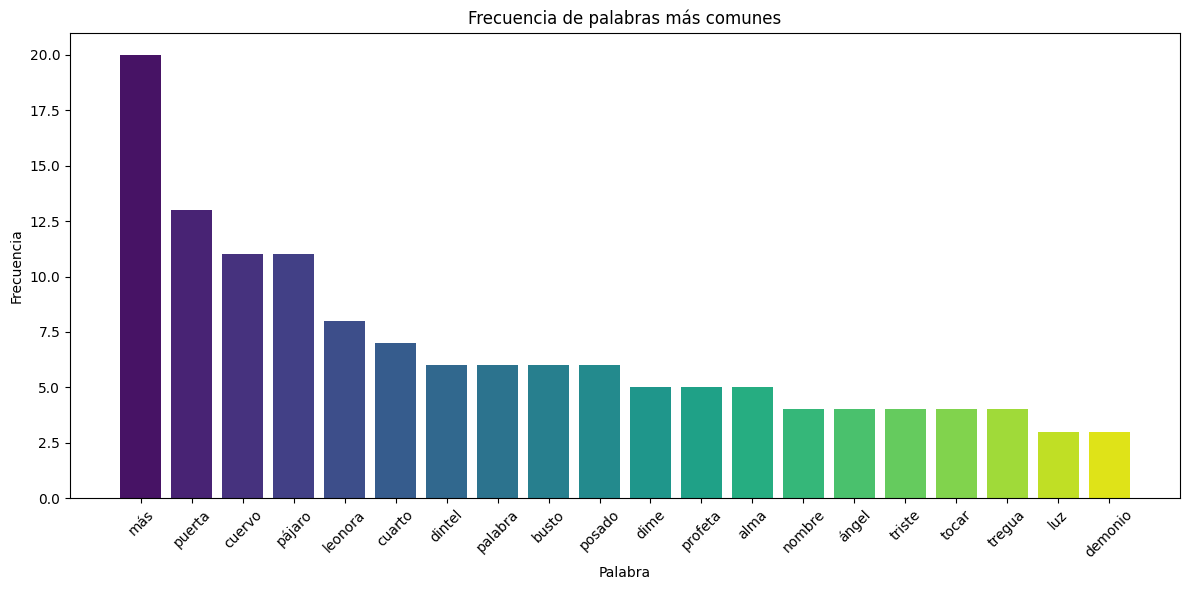

In [17]:
# Tomamos las 20 palabras más frecuentes
top_n = 20
df_top = df_palabras.head(top_n)

# Usamos la paleta "viridis" para colores variados
colors = sns.color_palette("viridis", top_n)

plt.figure(figsize=(12, 6))
plt.bar(df_top["Palabra"], df_top["Frecuencia"], color=colors)
plt.xticks(rotation=45)
plt.title("Frecuencia de palabras más comunes")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

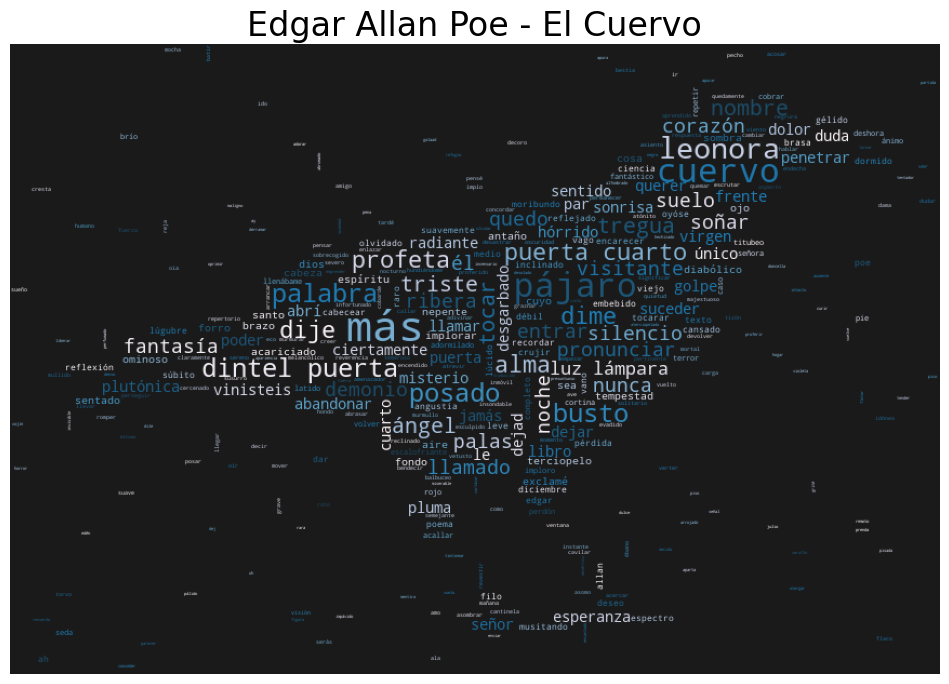

In [18]:
# 1. Cargar la imagen de máscara
hcmask = np.array(Image.open("TheRavenWordCloud.png"))

# 2. Crear lista con las palabras procesadas (ya lematizadas)
eap = tokens_limpios  # esta lista ya se generó antes

# 3. Generar la nube de palabras
plt.figure(figsize=(20, 18))

plt.subplot(211)
wc = WordCloud(
    background_color="black",
    max_words=10000,
    mask=hcmask,
    stopwords=STOPWORDS,
    max_font_size=40
)

wc.generate(" ".join(eap))

plt.title("Edgar Allan Poe - El Cuervo", fontsize=24)
plt.imshow(wc.recolor(colormap='PuBu', random_state=17), alpha=0.9)
plt.axis('off')
plt.show()


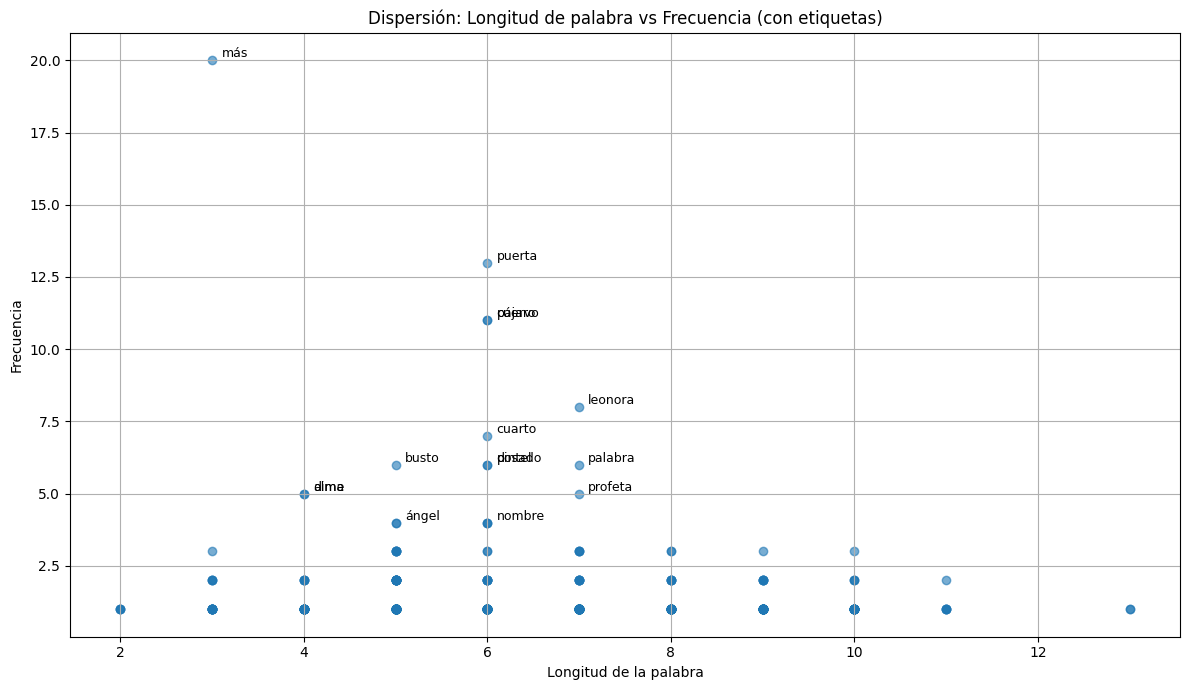

In [19]:
plt.figure(figsize=(12, 7))

# Dibujar puntos
df_palabras["Longitud"] = df_palabras["Palabra"].apply(len)
plt.scatter(df_palabras["Longitud"], df_palabras["Frecuencia"], alpha=0.6)

# Etiquetar las palabras más frecuentes (por ejemplo, top 15)
top_words = df_palabras.head(15)
for _, row in top_words.iterrows():
    plt.text(row["Longitud"] + 0.1, row["Frecuencia"] + 0.1, row["Palabra"], fontsize=9)

plt.title("Dispersión: Longitud de palabra vs Frecuencia (con etiquetas)")
plt.xlabel("Longitud de la palabra")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Generar bigramas a partir de los tokens limpios
lista_bigramas = list(bigrams(tokens_limpios))

# Contar bigramas más comunes
conteo_bigramas = Counter(lista_bigramas)
df_bigramas = pd.DataFrame(conteo_bigramas.items(), columns=["Bigrama", "Frecuencia"])
df_bigramas = df_bigramas.sort_values(by="Frecuencia", ascending=False).reset_index(drop=True)

# Mostrar los 10 primeros bigramas
df_bigramas.head(10)


,Bigrama,Frecuencia
0,"(dintel, puerta)",6
1,"(puerta, cuarto)",5
2,"(cuervo, más)",5
3,"(palas, dintel)",3
4,"(más, cuervo)",3
5,"(luz, lámpara)",3
6,"(triste, fantasía)",2
7,"(fantasía, sonrisa)",2
8,"(busto, palas)",2
9,"(ribera, noche)",2


# 📚 Análisis de Texto - El Cuervo (Edgar Allan Poe)

Este proyecto realiza un análisis de texto completo del poema **"El Cuervo"** (*The Raven*) en su versión traducida al español.

---

## ✅ Técnicas aplicadas

1. **Preprocesamiento de texto con spaCy**:
   - Tokenización
   - Conversión a minúsculas
   - Eliminación de stopwords
   - Lematización

2. **Análisis estadístico**:
   - Conteo de frecuencia de palabras
   - Longitud de palabras
   - Bigramas (pares de palabras más frecuentes)

3. **Visualizaciones**:
   - 📊 Gráfico de barras con palabras más frecuentes
   - ☁️ Nube de palabras personalizada (con máscara y estilo)
   - 🔍 Gráfico de dispersión: longitud vs frecuencia
   - 🧩 Tabla de bigramas más comunes

---

## 🧠 ¿Qué aprendimos?

- Cómo usar `spaCy` para procesar texto en español.
- Cómo construir visualizaciones útiles para análisis literario.
- Cómo observar patrones léxicos, estilo y vocabulario en un poema clásico.

---

## 🛠️ Herramientas utilizadas

- Python 3
- Jupyter Notebook
- `spaCy`
- `matplotlib`, `wordcloud`, `nltk`, `pandas`

---

## ✍️ Autor

**Pipe199x**  
*Proyecto educativo de análisis de texto en poesía clásica.*

---

